# **Team 3 EDA Final Project - DSE6000**

The following project outlines our team's analysis on life expectancy and the factors that affect it in Detroit, MI.

Team 3 Group Members:


*  Jamal Warida (fp6903)
*  Jatin Gongiwala (go7984)
*  Praveen Kumar Kumar (gp6834)




**Importing Packages:**

In [0]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from subprocess import check_output
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

**Importing All Datasets From Google Cloud:**

In [0]:
age=pd.read_excel("https://storage.googleapis.com/dsefiles/Wayne_County_Life_Expectancy_by_Zipcode.csv")
hosp=pd.read_excel("https://storage.googleapis.com/dsefiles/Hospitals%20(1).csv")
muap=pd.read_csv("https://storage.googleapis.com/dsefiles/Detroit_MUAP.csv")
brfss=pd.read_csv("https://storage.googleapis.com/dsefiles/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")


**Visualizing Datasets:**

In [0]:
age.head(2)

,ZIPCODE,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LIFE_EXP
0,48236,2648236,19463663,3357791,42.425373,-82.893194,82
1,48213,2648213,16923386,0,42.397931,-82.995213,70


In [0]:
hosp.head(2)

,OBJECTID,the_geom,Longitude,Latitude,FACNAME,BEDS,ADDRESS,CITY,CONTACT,CONPHONE,ZIPCODE
0,2,POINT (-83.05995248583335 42.35680777815136),-83.059952,42.356808,Department of Veterans Affairs Detroit Medical...,432,4646 John R Rd.,Detroit,Department of Veteran Affair,(313) 562-6000,48201
1,9,POINT (-82.91405691453649 42.41916225569439),-82.914057,42.419162,St. John Hospital & Medical Ctr. - Detroit,572,22101 Moross Rd.,Detroit,St. John Health System,(313) 343-4000,48236


In [0]:
muap.head(2)

,the_geom,aland10,namelsad10,tractce10,funcstat10,name10,intptlon10,intptlat10,mtfcc10,geoid10,awater10,statefp10,countyfp10,shape_area,shape_leng,srvc_area,MUAP,MUAP_index,MUAP_date,date_updat
0,MULTIPOLYGON (((-83.15892563126202 42.25736606...,1118325,Census Tract 5248,524800,S,5248,-83.161591,42.263100,G5020,26163524800,0,26,163,1.203676e+07,14666.801597,Southwest Detroit Service Area,Medically Underserved Area,42.4,9/27/1994,9/27/1994
1,MULTIPOLYGON (((-83.0767713973331 42.343641331...,1692449,Census Tract 5219,521900,S,5219,-83.080534,42.350399,G5020,26163521900,0,26,163,1.821557e+07,22567.227618,Wayne Service Area,Medically Underserved Area,55.5,5/5/1994,5/5/1994


In [0]:
brfss.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE


From the above initial datasets, we can see that the dataset columns have some uppercase words and many columns that hold information that has no value for us.



**Data Cleaning the Datasets:**

In [0]:
## Age Dataset:
age.columns = [x.lower() for x in age.columns]
age= age.drop(columns="geoid10")
age= age.drop(columns="aland10")
age= age.drop(columns="awater10")
age.head(1)

,zipcode,intptlat10,intptlon10,life_exp
0,48236,42.425373,-82.893194,82


In [0]:
## Hosp Dataset:
hosp.columns = [x.lower() for x in hosp.columns]
hosp= hosp.drop(columns="the_geom")
hosp= hosp.drop(columns="zipcode")
hosp.head(1)

,objectid,longitude,latitude,facname,beds,address,city,contact,conphone
0,2,-83.059952,42.356808,Department of Veterans Affairs Detroit Medical...,432,4646 John R Rd.,Detroit,Department of Veteran Affair,(313) 562-6000


In [0]:
## Muap Dataset:
muap= muap.drop(columns="the_geom")
muap= muap.drop(columns="aland10")
muap= muap.drop(columns="namelsad10")
muap= muap.drop(columns="tractce10")
muap= muap.drop(columns="funcstat10")
muap= muap.drop(columns="mtfcc10")
muap= muap.drop(columns="shape_area")
muap= muap.drop(columns="shape_leng")
muap.head(1)

,name10,intptlon10,intptlat10,geoid10,awater10,statefp10,countyfp10,srvc_area,MUAP,MUAP_index,MUAP_date,date_updat
0,5248,-83.161591,42.2631,26163524800,0,26,163,Southwest Detroit Service Area,Medically Underserved Area,42.4,9/27/1994,9/27/1994


In [0]:
## Brfss Dataset:
brfss.columns = [x.lower() for x in brfss.columns]
brfss.drop(['low_confidence_limit','high_confidence_limit ','yearend','topic','class','datasource','data_value_unit','questionid','classid','topicid','datavaluetypeid','data_value_type','data_value_footnote_symbol','data_value_footnote','stratificationcategoryid1','stratificationid1'],1);
brfss.head(1)

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,data_value_type,...,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL


The 4 datasets have been cleaned to a single uniform setup:

*   All column names were lowercased
*   Columns with unuseful data were deleted
*  There was no need in substituting NAN or missing valuess since as far as the numeric data that we want to use none showed missing values, and for some missing values we aren't able to take means to substitue the values since geolocations are distinct locations and means of those are unnecessary. 



**Dataset Analysis & Plots**

First, our team wanted to inspect the life expectancy in the city of Detroit which is part of Wayne County, the life expectancy was given with respect to a geolocation of different locations in Wayne County. 

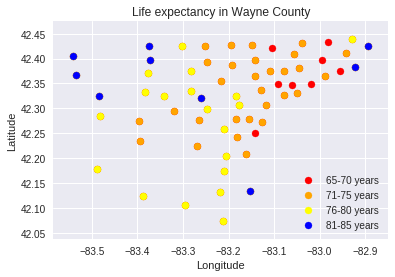

In [0]:
a1 = plt.scatter(y = "intptlat10" , x = "intptlon10" ,
                    data = age[(age['intptlat10']>0)  & (age['life_exp']>65)],color='red',label='65-70 years')
a2 = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = age[(age['intptlat10']>0)  & (age['life_exp']>70)],color='orange',label='71-75 years')
a3 = plt.scatter(x = "intptlon10" , y= "intptlat10" ,
                    data = age[(age['intptlat10']>0)  & (age['life_exp']>75)],color='yellow',label='76-80 years')
a4 = plt.scatter(y = "intptlat10" , x = "intptlon10" ,
                    data = age[(age['intptlat10']>0)  & (age['life_exp']>80)],color='blue',label='81-85 years')
plt.title('Life expectancy in Wayne County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(handles=[a1,a2,a3,a4])
plt.show()
 

From the above geolocation plot, we can see that across Wayne County , the saturation of the 2 lowest life expectancy groups (red & orange) are located in the top right side of the county which is representative of the city of Detroit (based on the geolocation that match Detroit city geolocation limits). For the 2 highest life expectancry groups (yellow & blue), they are mostly located to the left side of the and the bottom of the plot of the county which are the neighboring cities to Detroit .

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Trend of Life Expectancy in Wayne County')

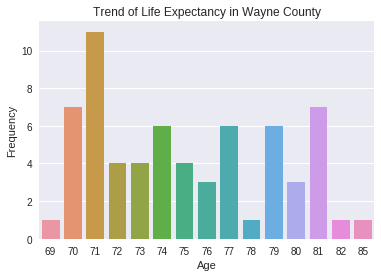

In [0]:
ax=sns.countplot(x='life_exp', data=age);
ax.set(xlabel='Age', ylabel='Frequency')
plt.title("Trend of Life Expectancy in Wayne County") 

From the above countplot we can see the frequency of each age life expectancy. From the visualization, we can see that the lowest age expectancy is 69 years and the highest is 85 years. 71 years of age was counted the most throughtout Wayne County. 

To better understand what the life expectancy data shows, we ran a statistics evaluation.

In [0]:
print("Median Life Expectancy: ", age['life_exp'].median())
print("Mean Life Expectancy: ", age['life_exp'].mean())
count =  np.count_nonzero(age['life_exp'] == 71)
print("Count of Life Expectancy age 71 years: ",count )

Median Life Expectancy:  74.0
Mean Life Expectancy:  75.07692307692308
Count of Life Expectancy age 71 years:  11


The mean life expectancy in Wayne County turned out to be 75.07 years. Compared to the US national life expectancy of 78.7 years, Wayne County's is lower by 3.63 years. Why is that?

We decided to further analyze what some common factors might be to this lower life expectancy. We used datasets that show hospital location, data on medically underserved areas within Detroit and the obesity status. We believe all these factors typically impact life expectancy.

**Factor 1: Hospital Locations within city of Detroit**

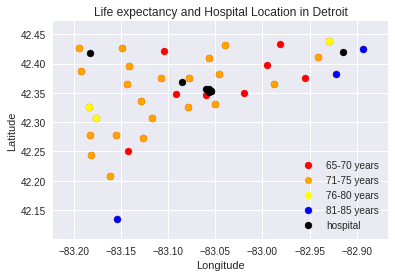

In [0]:
a1 = plt.scatter(y = "intptlat10" , x = "intptlon10" ,
                    data = age[(age['intptlon10']> -83.2)  & (age['life_exp']>65)],color='red',label='65-70 years')
a2 = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = age[(age['intptlon10']> -83.2)  & (age['life_exp']>70)],color='orange',label='71-75 years')
a3 = plt.scatter(x = "intptlon10" , y= "intptlat10" ,
                    data = age[(age['intptlon10']> -83.2)  & (age['life_exp']>75)],color='yellow',label='76-80 years')
a4 = plt.scatter(y = "intptlat10" , x = "intptlon10" ,
                    data = age[(age['intptlon10']> -83.2)  & (age['life_exp']>80)],color='blue',label='81-85 years')
a5 = plt.scatter(x = "longitude" , y = "latitude" ,
                    data = hosp[(hosp['longitude']<0) ],color='black',label='hospital')
plt.title('Life expectancy and Hospital Location in Detroit')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(handles=[a1,a2,a3,a4,a5])
plt.show()

We decided to further zoom in on the geolocation map of life expectancy to only focus on the life expectancy locations that are relevant to Detroit. We also mapped out the hospital locations in Detroit to see if the issue was with unavailbility and scarecity of hospitals within the city. From the plot, we can see that the hospitals had no effect on life expectancy since the life expectancy around the hospital locations was still the red and orange groups which are the 2 lowest.  For areas within Detroit that weren't as close to the hospitals, the same low life expectancy was shown which further proves our analysis that hospitals have no effect on life expectancy and that whether or not people had close access to hospitals next to them, their life expectancy didn't show change. 

**Factor 2: Medically Underserved Areas and Hospitals in Detroit**

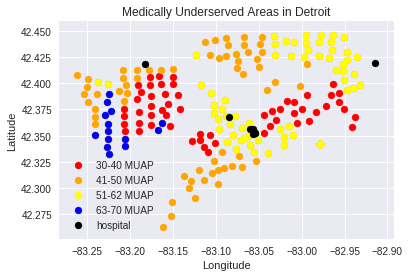

In [0]:
b = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = muap[(muap['intptlat10']>0)  & (muap['MUAP_index']<40)],color='red',label='30-40 MUAP')
b1 = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = muap[(muap['intptlat10']>0)  & (muap['MUAP_index']>40)],color='orange',label='41-50 MUAP')
b2 = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = muap[(muap['intptlat10']>0)  & (muap['MUAP_index']>50)],color='yellow',label='51-62 MUAP')
b3 = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = muap[(muap['intptlat10']>0)  & (muap['MUAP_index']>60)],color='blue',label='63-70 MUAP')
a5 = plt.scatter(x = "longitude" , y = "latitude" ,
                    data = hosp[(hosp['longitude']<0) ],color='black',label='hospital')

plt.title('Medically Underserved Areas in Detroit')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(handles=[b,b1,b2,b3,a5])
plt.show()

From the MUA index, any index of below 62 classifies means that the area is medically underserved, the lower the index the score the worse it is. From the above plot, we can see that Detroit shows many areas that are medically underserved, and the most prevalent are the blue and yellow MUAP which are the lowest groups. Even for areas that have hospitals (black dots), the area surrounding those still show as MUAP but not as low compared to the other areas within the city of Detroit. Our team can deduce that this overwhelming presence of medically underserved areas is a good factor to why the life expectancy in Detroit is low. If people struggle to receive medical treatment and services, chances are they won't be able to catch health issues and get medicated to better their health. This will lead to lower life spans for the citizens of Detroit. 

**Factor 3: Obesity**

The obesity dataset was included information for multiple states in the US, since our focus was on Detroit we decided to create a new dataset that is only relevant to Michigan State data. 

In [0]:
#Create separate Dataform from df by gender df2, by education level dfedu, and by income dfedu

brfss2=brfss[(brfss['stratification1']=='Male')|(brfss['stratification1']=='Female')]
brfssedu=brfss[brfss['stratificationcategory1']=='Education']
brfssinc=brfss[brfss['stratificationcategory1']=='Income']

#reset index for each of the new dataforms

brfss2 = brfss2.reset_index(drop = True)
brfssedu = brfssedu.reset_index(drop = True)
brfssinc = brfssinc.reset_index(drop = True)

In [0]:
#Each category has the same survey questions

brfss2['question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
     

In [0]:
#here we are interested in the survey question directly about obesity and overweight percent

X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']


brfss2=brfss2[brfss2['question']==X[0]]


In [0]:
#Creating data including only Michigan State records
brfssmi=brfss2[brfss2['locationdesc']=='Michigan']

In [0]:
brfssmi.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,data_value_type,...,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
1067,2011,2011,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Male,GEN,MALE
1068,2011,2011,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Female,GEN,FEMALE
1085,2012,2012,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Male,GEN,MALE
1086,2012,2012,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Female,GEN,FEMALE
1091,2013,2013,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Male,GEN,MALE


After the Michigan State obesity dataset was created, our team decided to conduct analysis on that and compare it to the initial national dataset to see how Michigan ranks among other states. This is useful since we can better understand how this obesity in the state affects life expectancy. 

In [0]:
#separate out national so that we can calculate the national obesity rate
brfss2n=brfss2[(brfss2['locationdesc']=='National')]

In [0]:
#calculate Michigan State obesity rate
mi=sum(brfssmi['data_value'])/len(brfssmi)
print("Percentage of obesity in Michigan is:",mi,"%.")

Percentage of obesity in Michigan is: 31.375 %.


In [0]:
#group data by state and take the mean of men and women rates for each state

sorted_brfss = brfss2.sort_values(['locationdesc'], ascending = [True])
sorted_brfss=sorted_brfss[['locationabbr','locationdesc','data_value','gender']]
sorted_brfss = sorted_brfss.groupby('locationdesc', as_index=False).mean()

#calculate the average (over men and women) obesity rate for the country

natmeanobesity=sum(brfss2n['data_value'])/len(brfss2n)
print("Percentage of obesity in the US is:",natmeanobesity,"%.")

Percentage of obesity in the US is: 28.45833333333334 %.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


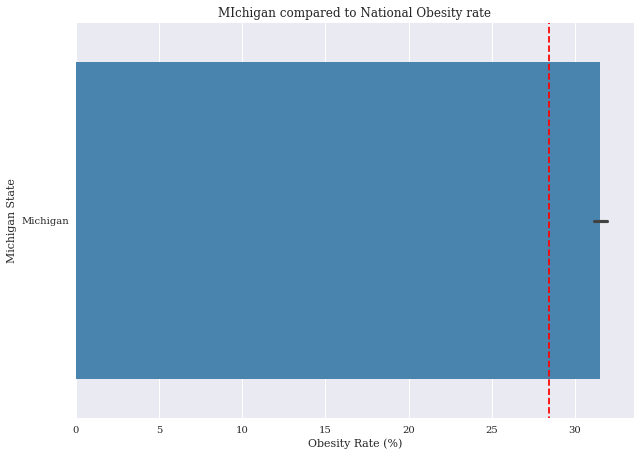

In [0]:
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

brfssmi = brfssmi.sort_values(['data_value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=brfssmi.tail(10).locationdesc,x=brfssmi.tail(10).data_value,palette="Blues_d")
ax.set_ylabel('Michigan State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('MIchigan compared to National Obesity rate')
plt.plot([natmeanobesity,natmeanobesity],[-1,10], '--',color = 'r')


From the above plot, we can see that the Michigan state obesity rate is higher than the national obesity rate.

How does Michigan compare to other top obese states?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


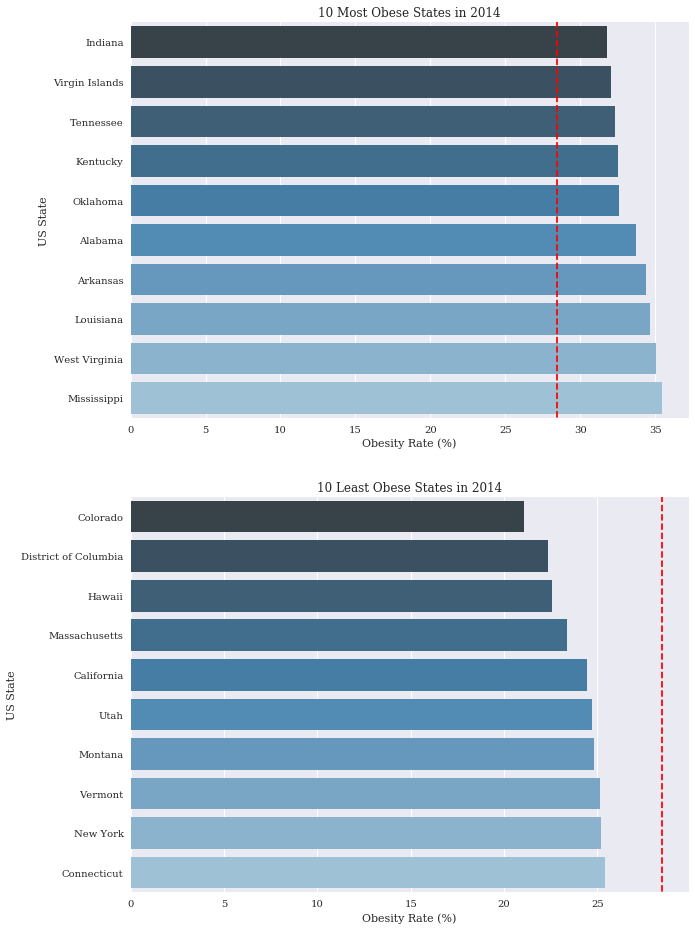

In [0]:
#Let's plot a bar graph of the most and least obese states in the US
#Mark the national average in red

#For those that have LaTex
#plt.rc('text', usetex=True)

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

sorted_brfss = sorted_brfss.sort_values(['data_value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_brfss.tail(10).locationdesc,x=sorted_brfss.tail(10).data_value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States in 2014')
plt.plot([natmeanobesity,natmeanobesity],[-1,10], '--',color = 'r')

plt.subplot(2,1,2)
ax=sns.barplot(y=sorted_brfss.head(10).locationdesc,x=sorted_brfss.head(10).data_value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Least Obese States in 2014')

plt.plot([natmeanobesity,natmeanobesity],[-1,10], '--',color = 'r')

The above plots show the top 10 most and least obese states compared to the national obesity average. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


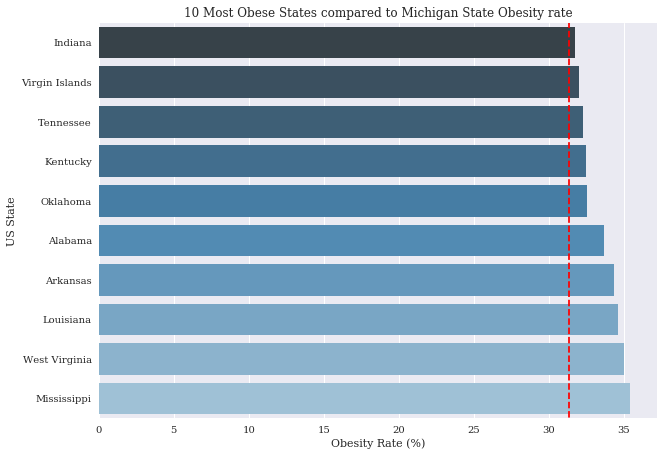

In [0]:
#Let's plot a bar graph of the most obese states in the US
#Mark the national average in red

#For those that have LaTex
#plt.rc('text', usetex=True)

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

sorted_brfss = sorted_brfss.sort_values(['data_value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_brfss.tail(10).locationdesc,x=sorted_brfss.tail(10).data_value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States compared to Michigan State Obesity rate')
plt.plot([mi,mi],[-1,10], '--',color = 'r')



As you can see from the above plot of the top 10 obese states, the state of Michigan's obesity rate is very close to some of those State's obesity rate.

Do high percentage obese states show variation in life expectancy compared to the national life expectancy?

From online sources, the state life expectancy for the following top 10 obese states is as follows:


*   Indiana: 77.6 years
*   Virgin Islands: 79.2 years
*   Tennessee: 76.3 years
*   Kentucky: 76.0 years
*   Oklahoma: 75.9 years
*   Alabama: 75.4 years
*   Arkansas: 76.0 years
*   Louisiana: 75.7 years
*   West Virginia: 75.4 years
*   Mississippi: 75 years




Compared to the US life expectancy of 78.7 years, 9 of the 10 top obese states showed lower life expectancy than the national average. This shows that obesity plays an inversely proportional role with respect to life expectancy and is an indication to why the life expectancy in Detroit is the way it is. 
For Detroit's analyis, since it is a part of Michigan it follows the trend of having a higher than national average obesity as proven in the figure above. This leads to a lower expected life expectancy for the state of Michigan and thus Detroit is under the same effect. The reason why Detroit also shows an added lower life expectancy is due to the other factor of high concentration of medically underserved areas within the city limits. Both those factors play a negative effect on life expectancy for the citizens of Detroit city.

**Conclusion**

Our team wanted to explore the life expectancy in the city of Detroit and why it was lower than the national average. We decided to better understand 3 factors pertinent to Detroit that might explain our topic. Our 3 factors were hospital locations, medically underseved areas and obesity. It has been proven that lifestyle choice(good diet) and access to healthcare have greatly impacted and increased human life expectancy throughout history. That's why our team believes in order to get the most accurate analysis those factors were the most important. 
The 1st factor, which was hospital locations within Detroit, our analysis showed that hospital location had no effect on life expectancy becuase whether or not people lived near the hospital they still showed the same low life expectancy. This makes sense since hospitals are usually used to treat emergency situations and operations. Even though hospitals help extend and better human life expectancy, they don't play a crucial role in raising the expectancy for all citizens of Detroit since it only benefits the people who are need of hospital assistance. Our 2nd factor was the amount of medically underserved areas within Detroit, through our analysis we found that Detroit has an abundance of medically underserved areas which is set by the index of qualification. The high amount of medically underserved areas plays an adverse affect on life expectancy and that can be attributed to people not having access to primary care and care for senior citizens. The last factor was the obesity rate in Michigan which is representative of Detroit as well. We were able to find that Michigan has an above national average obesity rate and when compared to the life expectancy of the most obese states they all showed the same trend of low life expectancy. This goes to show that the obesity rate plays a negative effect on life expectancy. 

So overall medically underserved areas and obesity were the only factors that played a negative role on the life expectancy in Detroit and are big factors on why life expectancy is low. Hospitals had no effect and thus is not a good indicator. In order to boost the life expectancy to come close to the national average, Detroit has to explore ways to lower the amount of medically underserved areas and educate the citizens on their diet so that the obesity rate decreases. 